In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

### Генерация выборки

In [2]:
data = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1)

In [3]:
X = data[0]
y = data[1]

### Визуализация kNN для разных k

In [4]:
def vote_for_label(x):
    votes = np.array([[i, np.sum(x[x==i])] for i in np.unique(x)])
    return votes[np.argmax(votes[:, 1])][0]

In [ ]:
from sklearn.base import BaseEstimator
class kNN(BaseEstimator):
    def __init__(self, k):
        self.k = k
        self.neighbors = NearestNeighbors(n_neighbors=k)
        
    def fit(self, X, y):
        self.neighbors.fit(X, y)
    
    def predict(self, X):
        return map(vote_for_label, y[classifier.kneighbors(X)[1]])

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

k = 2
density = 30

In [14]:
def visualise_set(X, y, k, density):
    ax = plt.figure().add_subplot(111)
    colors = ['r', 'b', 'g', 'y', 'bl']
    for i in range(len(np.unique(y))):
        ax.scatter(X[y == i][:, 0], X[y == i][:, 1], color=colors[i])
    classifier = NearestNeighbors(n_neighbors=k)
    classifier.fit(X, y)
    x_ax = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, density)
    y_ax = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, density)
    dens_x = x_ax[1]-x_ax[0]
    dens_y = y_ax[1]-y_ax[0]
    grid = np.transpose([np.tile(x_ax, len(y_ax)), np.repeat(y_ax, len(x_ax))])
    labels = map(vote_for_label, y[classifier.kneighbors(grid)[1]])
    for i in range(len(grid)):
        ax.fill_between([grid[i][0] - dens_x/2, grid[i][0] + dens_x/2],
                        [grid[i][1] - dens_y/2, grid[i][1] - dens_y/2],
                        [grid[i][1] + dens_y/2, grid[i][1] + dens_y/2], color=colors[labels[i]], alpha=0.2)
    plt.show()

<IPython.core.display.Javascript object>


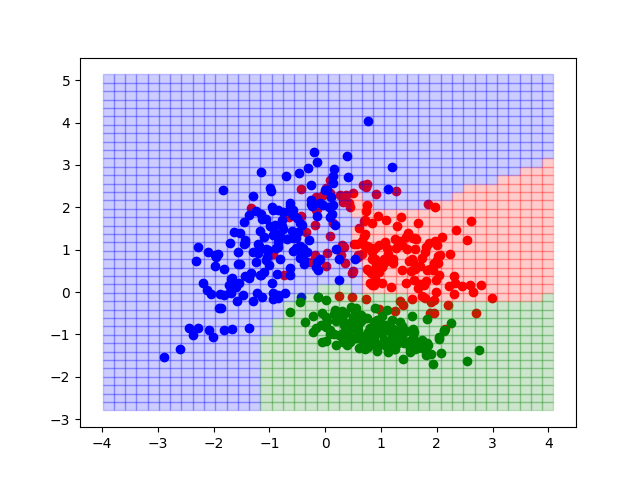

In [15]:
visualise_set(X, y, 10, 40)

<IPython.core.display.Javascript object>


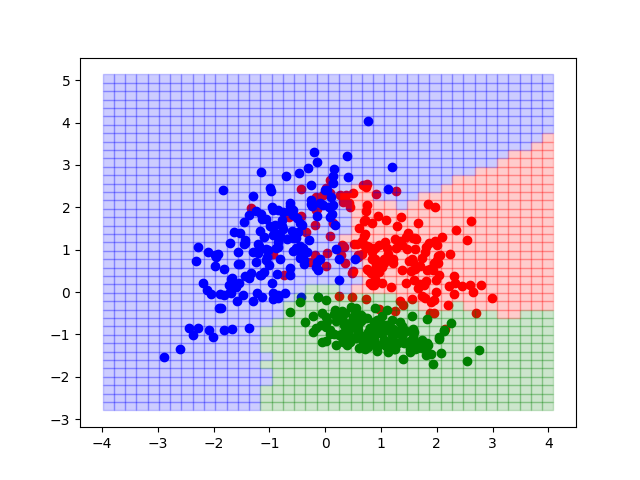

In [16]:
visualise_set(X, y, 5, 40)

<IPython.core.display.Javascript object>


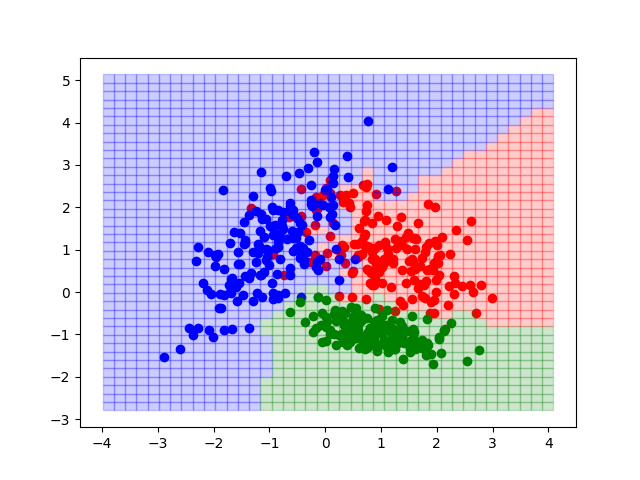

In [17]:
visualise_set(X, y, 2, 40)

<IPython.core.display.Javascript object>


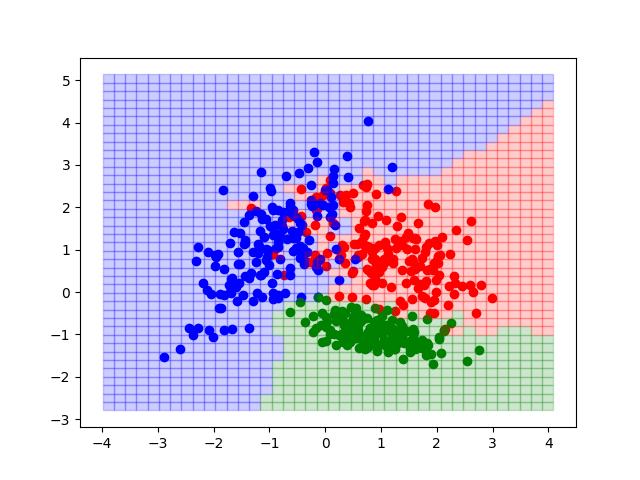

In [18]:
visualise_set(X, y, 1, 40)

### Зависимость accuracy от k

In [19]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score()